# Logistic Regression Cross Entropy

How Cross-Entropy using random initialization influence the accuracy of the model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [ ]:
# Create class for plotting and the function for plotting


class plot_error_surfaces(object):

    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat = 1 / (1 + np.exp(-1 * (w2 * self.x + b2)))
                Z[count1, count2] = -1 * np.mean(
                    self.y * np.log(yhat + 1e-16)
                    + (1 - self.y) * np.log(1 - yhat + 1e-16)
                )
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection="3d").plot_surface(
                self.w,
                self.b,
                self.Z,
                rstride=1,
                cstride=1,
                cmap="viridis",
                edgecolor="none",
            )
            plt.title("Loss Surface")
            plt.xlabel("w")
            plt.ylabel("b")
            plt.show()
            plt.figure()
            plt.title("Loss Surface Contour")
            plt.xlabel("w")
            plt.ylabel("b")
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection="3d")
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c="r", marker="x", s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c="r", marker="x")
        plt.xlabel("w")
        plt.ylabel("b")
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, "ro", label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(
            self.x,
            1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))),
            label="sigmoid",
        )
        plt.xlabel("x")
        plt.ylabel("y")
        plt.ylim((-0.1, 2))
        plt.title("Data Space Iteration: " + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c="r", marker="x")
        plt.title("Loss Surface Contour Iteration" + str(self.n))
        plt.xlabel("w")
        plt.ylabel("b")


# Plot the diagram


def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=("epoch " + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), "r")
    if leg == True:
        plt.legend()
    else:
        pass

In [3]:
# Set random seed
torch.manual_seed(0)

In [ ]:
# Create the data class


class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index: int):
        return self.x[index], self.y[index]

    # Get length
    def __len__(self):
        return self.len

In [5]:
# Create Data object
data_set = Data()

In [6]:
class logistic_regression(nn.Module):

    # Constructor
    def __init__(self, n_inputs: int):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)

    # Prediction
    def forward(self, x: torch.Tensor):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [7]:
model = logistic_regression(1)

Replace the random initialized variable values. Theses random initialized variable values did convergence for the RMS Loss but will converge for the Cross-Entropy Loss.


In [8]:
# Set the weight and bias

model.state_dict()["linear.weight"].data[0] = torch.tensor([[-5]])
model.state_dict()["linear.bias"].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict({'linear.weight': tensor([[-5.]]), 'linear.bias': tensor([-10.])})


<Figure size 640x480 with 0 Axes>

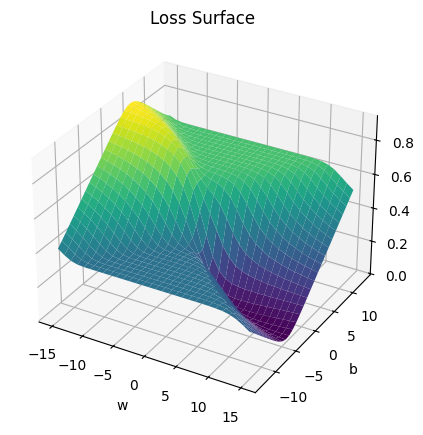

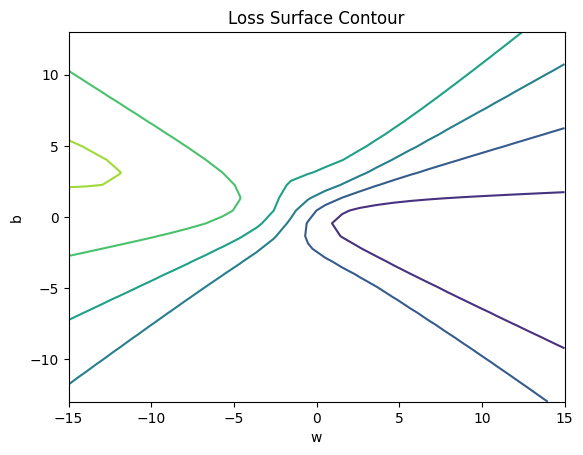

In [9]:
# Visualize the data space and the parameter space during training
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

In [10]:
# def criterion(yhat, y):
#     out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
#     return out


# Build in criterion
criterion = nn.BCELoss()

trainloader = DataLoader(dataset=data_set, batch_size=3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

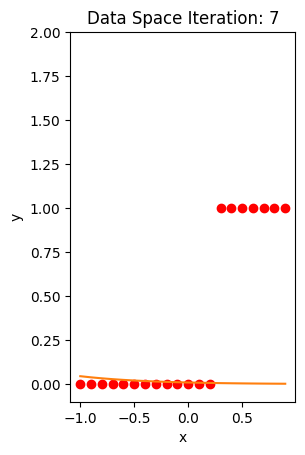

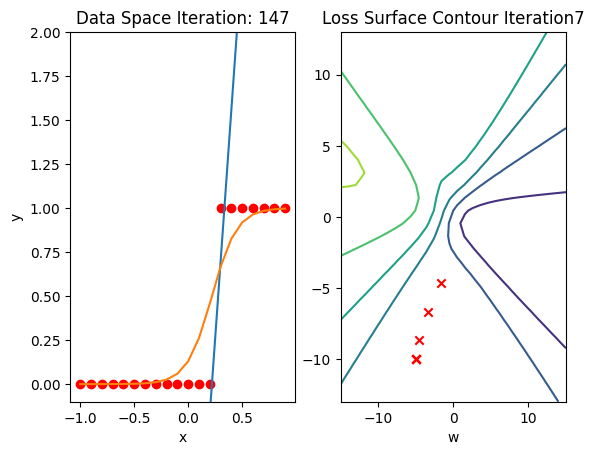

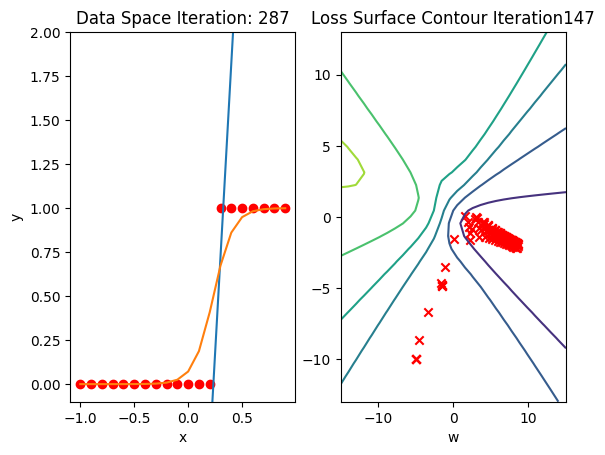

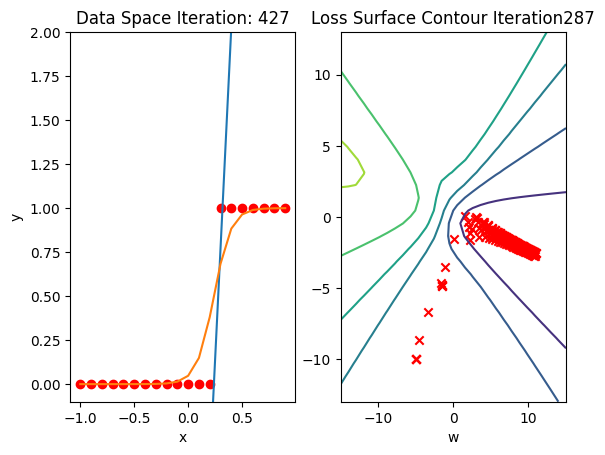

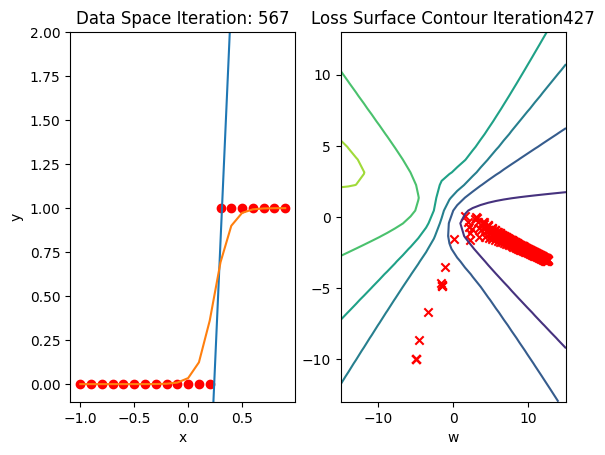

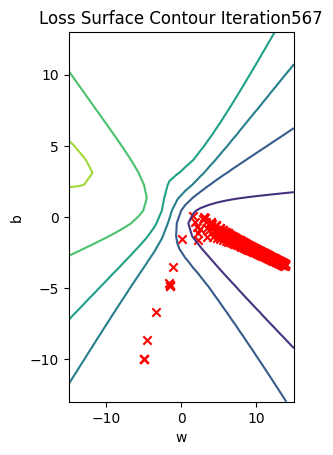

In [11]:
epochs = 100


def train_model(epochs: int):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()


train_model(epochs)

In [12]:
yhat = model(data_set.x)
label = yhat > 0.5
print(
    "The accuracy: ",
    torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)),
)

The accuracy:  tensor(1.)


The accuracy is perfect.
